In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [4]:
df = pd.read_csv("DFd.csv")
df.head()

,patient_id,gender,education,treatment_data,id_healthcenter,id_treatment_region,hereditary_history,birth_date,age,weight,...,taking_gallbladder_disease_medicine,smoking,alcohol,breast_pain,radiation_history,Birth_control(Contraception),\nmenstrual_age,menopausal_age,Benign_malignant_cancer,condition
0,111038163288,0,4,2019,1110000306,1110000330,1,1990,29,77,...,0,0,0,1,0,0,1,0.0,0,under treatment
1,111038152771,0,3,2019,1110000126,1110000330,0,1982,37,96,...,0,0,1,1,1,1,1,0.0,0,under treatment
2,111038175699,0,2,2019,1110000311,1110000330,1,1986,33,89,...,1,0,0,0,0,1,2,0.0,0,under treatment
3,111038141164,0,3,2019,1110000077,1110000329,1,1956,63,88,...,1,1,0,1,1,1,1,2.0,1,under treatment
4,111038158630,0,1,2019,1110000048,1110000330,0,1994,25,76,...,0,1,1,1,0,1,1,0.0,1,under treatment


In [5]:
df=df.drop(['patient_id', 'education','treatment_data','id_healthcenter','id_treatment_region','birth_date','thickness_tumor','radiation_history','Benign_malignant_cancer','condition'], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               1055 non-null   int64  
 1   hereditary_history                   1055 non-null   int64  
 2   age                                  1055 non-null   int64  
 3   weight                               1055 non-null   int64  
 4   marital_status                       1055 non-null   int64  
 5   marital_length                       1055 non-null   int64  
 6   pregnency_experience                 1055 non-null   int64  
 7   giving_birth                         1055 non-null   int64  
 8   age_FirstGivingBirth                 1055 non-null   int64  
 9   
abortion                            1055 non-null   int64  
 10  blood                                1055 non-null   int64  
 11  taking_heartMedicine          

In [7]:
df.dropna(inplace = True)

In [8]:
df.isnull().sum()
df.isna().sum()

gender                                 0
hereditary_history                     0
age                                    0
weight                                 0
marital_status                         0
marital_length                         0
pregnency_experience                   0
giving_birth                           0
age_FirstGivingBirth                   0
\nabortion                             0
blood                                  0
taking_heartMedicine                   0
taking_blood_pressure_medicine         0
taking_gallbladder_disease_medicine    0
smoking                                0
alcohol                                0
breast_pain                            0
Birth_control(Contraception)           0
\nmenstrual_age                        0
menopausal_age                         0
dtype: int64

In [9]:
X= df.iloc[:,1:19].values
Y= df.iloc[:,19].values

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
# from sklearn.metrics import confusion_matrix
# confusion_matrix(Y_test, Y_pred)

In [13]:
from sklearn.metrics import accuracy_score

0.8939393939393939
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96       238
         1.0       0.12      0.07      0.09        14
         2.0       0.25      0.08      0.12        12

    accuracy                           0.89       264
   macro avg       0.43      0.38      0.39       264
weighted avg       0.86      0.89      0.87       264



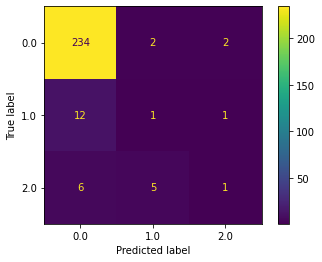

In [39]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
print(accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test,Y_pred))
cm = confusion_matrix(Y_test, Y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()

plt.show()

0.8977272727272727
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       238
         1.0       0.00      0.00      0.00        14
         2.0       0.00      0.00      0.00        12

    accuracy                           0.90       264
   macro avg       0.30      0.33      0.32       264
weighted avg       0.82      0.90      0.86       264



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


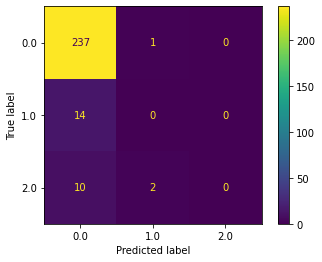

In [40]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
print(accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test,Y_pred))
cm = confusion_matrix(Y_test, Y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()

plt.show()

0.8977272727272727
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96       238
         1.0       0.22      0.14      0.17        14
         2.0       0.25      0.08      0.12        12

    accuracy                           0.90       264
   macro avg       0.47      0.40      0.42       264
weighted avg       0.86      0.90      0.88       264



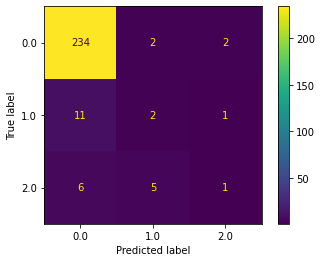

In [41]:
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
print(accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test,Y_pred))
cm = confusion_matrix(Y_test, Y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()

plt.show()

0.8636363636363636
              precision    recall  f1-score   support

         0.0       0.98      0.90      0.94       238
         1.0       0.25      0.43      0.32        14
         2.0       0.35      0.58      0.44        12

    accuracy                           0.86       264
   macro avg       0.53      0.64      0.56       264
weighted avg       0.91      0.86      0.88       264



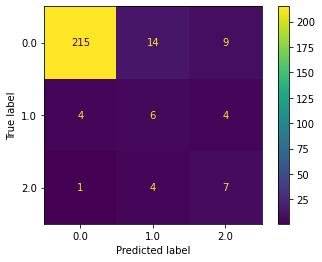

In [42]:
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
print(accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test,Y_pred))
cm = confusion_matrix(Y_test, Y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()

plt.show()

0.9128787878787878
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       238
         1.0       0.43      0.43      0.43        14
         2.0       0.38      0.25      0.30        12

    accuracy                           0.91       264
   macro avg       0.59      0.55      0.57       264
weighted avg       0.90      0.91      0.91       264



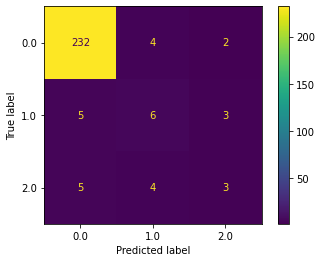

In [43]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
print(accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test,Y_pred))
cm = confusion_matrix(Y_test, Y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()

plt.show()

0.9128787878787878
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       238
         1.0       0.60      0.43      0.50        14
         2.0       0.33      0.17      0.22        12

    accuracy                           0.91       264
   macro avg       0.62      0.52      0.56       264
weighted avg       0.89      0.91      0.90       264



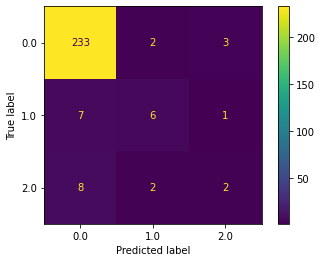

In [44]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
print(accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test,Y_pred))
cm = confusion_matrix(Y_test, Y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()

plt.show()